In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series = [500, 350, 250, 400, 450, 350, 200, 300, 350, 200,150,400, 550,350,
         250, 550, 550, 400, 350, 600, 750, 500, 400, 650, 850]
index = pd.date_range('2000-03-31', periods=25, freq='Q')

data = pd.DataFrame(series, index=index).astype('float')
data.columns = ['Demand']

In [3]:
malli = Holt(data['Demand']).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


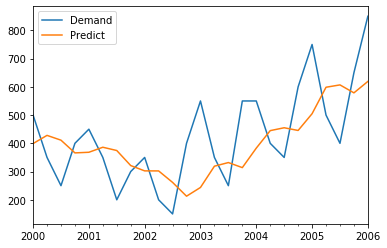

In [4]:
data['Predict'] = malli.fittedvalues
data.plot()

In [5]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

146.35373320674327

In [6]:
mean_absolute_error(data['Demand'], data['Predict'])

124.62521942018994

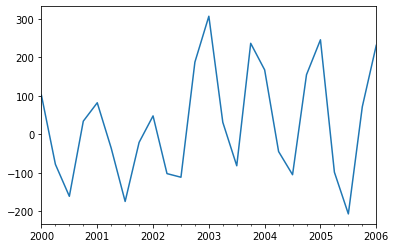

In [7]:
data['Resid'] = malli.resid
data['Resid'].plot()

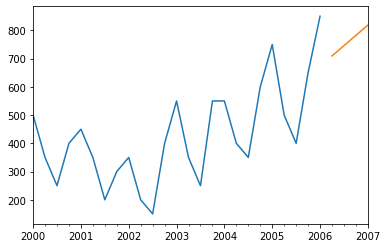

In [8]:
index = pd.date_range('2006-06-30', periods=4, freq='Q')

datap = pd.DataFrame(malli.forecast(4), index=index)
datap.columns = ['Predict']

data['Demand'].plot()
datap['Predict'].plot()

In [9]:
malli.params

{'smoothing_level': 0.23301334131889478,
 'smoothing_slope': 0.23301297209039173,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 399.14124566401256,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}